## K-Nearest Neighbor(KNN) Model

## Implement a KNN model to classify the Glasses into categories


## Importing Libraries

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the data

In [ ]:
glass_data = pd.read_csv('/content/glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass_data.shape

(214, 10)

In [ ]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [ ]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
glass_data.loc[glass_data.duplicated(),:]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
glass_data_d1 = glass_data.drop(index= 39)

In [ ]:
glass_data_d2 = glass_data_d1.drop(columns= ['Type'])

## Data Preparation

In [ ]:
st_model= StandardScaler()

In [ ]:
scale_data=st_model.fit_transform(glass_data_d2)
glass_data_d3 = pd.DataFrame(scale_data, columns=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe'])
glass_data_d3.head(6)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
5,-0.789119,-0.753716,0.646254,0.344645,0.407845,0.216568,-0.621487,-0.353808,2.082200


In [ ]:
X= glass_data_d3
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.879840,0.289558,1.257238,-0.706370,-1.133248,-0.673480,-0.143466,-0.353808,-0.588301
1,-0.243816,0.596403,0.639311,-0.180863,0.097037,-0.028962,-0.790201,-0.353808,-0.588301
2,-0.716412,0.154546,0.604596,0.182950,0.433746,-0.167073,-0.825349,-0.353808,-0.588301
3,-0.227291,-0.238216,0.701798,-0.322346,-0.058368,0.109149,-0.516041,-0.353808,-0.588301
4,-0.306608,-0.164573,0.653197,-0.423405,0.550299,0.078457,-0.621487,-0.353808,-0.588301
...,...,...,...,...,...,...,...,...,...
208,-0.699888,0.903249,-1.860172,2.891336,-0.058368,-0.642789,0.158812,1.778672,-0.588301
209,-0.494986,1.860605,-1.860172,1.092483,0.524398,-0.765554,-0.389506,2.844912,-0.588301
210,0.760865,1.173272,-1.860172,1.153118,0.990612,-0.765554,-0.361387,2.945501,-0.588301
211,-0.607351,1.197820,-1.860172,0.991424,1.236668,-0.765554,-0.333268,2.804676,-0.588301


In [ ]:
X.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02,2.130000e+02
mean,-9.988359e-15,-3.444298e-15,-3.544374e-17,8.235457e-17,1.006498e-14,1.188408e-16,-1.209127e-15,7.297241e-16,-1.459448e-16
std,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00,1.002356e+00
min,-2.378762e+00,-3.282120e+00,-1.860172e+00,-2.343529e+00,-3.684469e+00,-7.655541e-01,-2.477335e+00,-3.538076e-01,-5.883011e-01
25%,-6.040464e-01,-6.187036e-01,-4.090832e-01,-5.244639e-01,-4.857298e-01,-5.660605e-01,-5.019818e-01,-3.538076e-01,-5.883011e-01
50%,-2.206815e-01,-1.277513e-01,5.559947e-01,-1.808627e-01,1.747387e-01,9.380307e-02,-2.489117e-01,-3.538076e-01,-5.883011e-01
75%,2.651344e-01,4.982129e-01,6.393107e-01,3.648569e-01,5.632496e-01,1.705314e-01,1.377232e-01,-3.538076e-01,4.388147e-01
max,5.149732e+00,4.879962e+00,1.257238e+00,4.144470e+00,3.567734e+00,8.764103e+00,5.086650e+00,5.983278e+00,4.649990e+00


In [ ]:
y=glass_data_d1.iloc[:,9:10]
y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size = 0.2,random_state=2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((170, 9), (43, 9), (170, 1), (43, 1))

### choose the Optimal Number of Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()

In [ ]:
CV_Scores = []
for i in range(1,26,2):
  knn_model = KNeighborsClassifier(n_neighbors=i)
  cross_validation_score = cross_val_score(estimator = knn_model,X=X,y=y,cv=6)
  CV_Scores.append(cross_validation_score.mean())


In [ ]:
CV_Scores

[0.6287037037037037,
 0.6711640211640212,
 0.6666666666666666,
 0.6478835978835978,
 0.6243386243386243,
 0.6054232804232803,
 0.5865079365079365,
 0.5961640211640212,
 0.5772486772486772,
 0.5958994708994709,
 0.577116402116402,
 0.5723544973544973,
 0.5772486772486772]

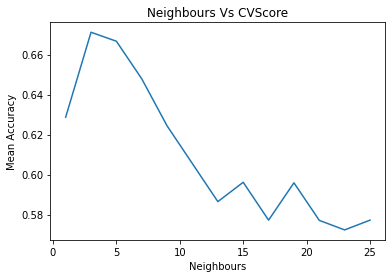

In [ ]:
sns.lineplot(range(1,26,2),CV_Scores)
plt.title('Neighbours Vs CVScore')
plt.xlabel('Neighbours')
plt.ylabel('Mean Accuracy')
plt.show()


In [ ]:
CV_Scores.index(max(CV_Scores))

1

**Index 1 corresponds to the 3 Neighbours so it is the Optimal Number for this data.**

## Model Preparation

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)

## Model Training

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_train =knn_model.predict(X_train)

In [ ]:
y_pred_test =knn_model.predict(X_test)

## Model Evaluation

In [ ]:
accuracy_score(y_train,y_pred_train)

0.8294117647058824

In [ ]:
confusion_matrix(y_train,y_pred_train)

array([[48,  3,  0,  0,  0,  0],
       [ 6, 51,  0,  2,  0,  0],
       [ 9,  1,  4,  0,  0,  0],
       [ 2,  1,  0,  9,  0,  1],
       [ 0,  0,  0,  0,  6,  1],
       [ 2,  1,  0,  0,  0, 23]])

In [ ]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           1       0.72      0.94      0.81        51
           2       0.89      0.86      0.88        59
           3       1.00      0.29      0.44        14
           5       0.82      0.69      0.75        13
           6       1.00      0.86      0.92         7
           7       0.92      0.88      0.90        26

    accuracy                           0.83       170
   macro avg       0.89      0.75      0.79       170
weighted avg       0.85      0.83      0.82       170



In [ ]:
accuracy_score(y_test,y_pred_test)

0.5813953488372093

In [ ]:
confusion_matrix(y_test,y_pred_test)

array([[12,  5,  1,  0,  0,  0],
       [ 6, 10,  0,  1,  0,  0],
       [ 1,  1,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  1,  0],
       [ 0,  1,  0,  1,  0,  1]])

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           1       0.63      0.67      0.65        18
           2       0.56      0.59      0.57        17
           3       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         0
           6       1.00      0.50      0.67         2
           7       1.00      0.33      0.50         3

    accuracy                           0.58        43
   macro avg       0.61      0.40      0.46        43
weighted avg       0.64      0.58      0.59        43



## Model Deployment

In [ ]:
from pickle import dump

In [ ]:
dump(knn_model, open('KNN_Glass_Data','wb'))

In [ ]:
from pickle import load

In [ ]:
linear_read_model = load(open('/content/KNN_Glass_Data','rb'))

In [ ]:
knn_model.predict(X_test)

array([5, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 3, 5, 7, 1,
       3, 2, 1, 2, 2, 6, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2])